<figure style="text-align: center;">
  <img src="_static/intro/title_page.png" style="display: block; margin: 0 auto; width: 100%;">
</figure>

### Convolutional Neural Networks

Michael J. Pyrcz, Professor, The University of Texas at Austin 

[Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

Chapter of e-book "Applied Machine Learning in Python: a Hands-on Guide with Code". 

```{admonition} Cite this e-Book as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *Applied Machine Learning in Python: A Hands-on Guide with Code* [e-book]. Zenodo. doi:10.5281/zenodo.15169138 [![DOI](https://zenodo.org/badge/863274676.svg)](https://doi.org/10.5281/zenodo.15169138) 
```

The workflows in this book and more are available here:

```{admonition} Cite the MachineLearningDemos GitHub Repository as:
:class: remove-from-content-only

Pyrcz, M.J., 2024, *MachineLearningDemos: Python Machine Learning Demonstration Workflows Repository* (0.0.3) [Software]. Zenodo. DOI: 10.5281/zenodo.13835312. GitHub repository: https://github.com/GeostatsGuy/MachineLearningDemos [![DOI](https://zenodo.org/badge/862519860.svg)](https://zenodo.org/doi/10.5281/zenodo.13835312)
```

By Michael J. Pyrcz <br />
&copy; Copyright 2024.

This chapter is a tutorial for / demonstration of **Convolutional Neural Networks**. 

**YouTube Lecture**: check out my lectures on:

* [Artificial Neural Networks](https://youtu.be/A9PiCMY_6nM?si=NxWSU_5RgQ4w55EL)
* [Convolutional Neural Networks](https://youtu.be/za2my_XDoOs?si=LeHU6p2_fc9dX4Yt)

These lectures are all part of my [Machine Learning Course](https://youtube.com/playlist?list=PLG19vXLQHvSC2ZKFIkgVpI9fCjkN38kwf&si=XonjO2wHdXffMpeI) on YouTube with linked well-documented Python workflows and interactive dashboards. My goal is to share accessible, actionable, and repeatable educational content. If you want to know about my motivation, check out [Michael's Story](https://michaelpyrcz.com/my-story). 

#### Motivation

Convolutional neural networks are very powerful, nature inspired computing deep learning method based on an analogy of visual cortex extending the ability of our artificial neural networks to better work with images.

Nature inspired computing is looking to nature for inspiration to develop novel problem-solving methods,

* **artificial neural networks** are inspired by biological neural networks

* **nodes** in our model are artificial neurons, simple processors  

* **connections** between nodes are artificial synapses

* **perceptive fields** regularization to improve generalization and efficiency 

intelligence emerges from many connected simple processors. For the remainder of this chapter, I will used the terms nodes and connections to describe our convolutional neural network.


#### Concepts in Common with Artificial Neural Networks

Here are some key aspects of artificial neural networks (ANNs),

**Basic Design** - *"...a computing system made up of a number of simple, highly interconnected processing elements, which process information by their dynamic state response to external inputs."* Caudill (1989). 

**Still a Prediction Model** - while these models may be quite complicated with even millions of trainable model parameters, weights and biases, they are still a function that maps from predictor features to response features,

$$
Y=f(X)+\epsilon
$$

**Supervised learning** – we provide training data with predictor features, $X_1,\ldots,𝑋_𝑚$ and response feature(s), $𝑌_1,\ldots,𝑌_K$, with the expectation of some model prediction error, $\epsilon$. 

**Nonlinearity** - nonlinearity is imparted to the system through the application of nonlinear activation functions to model nonlinear relationships

**Universal Function Approximator (Universal Approximation Theorem)** - artificial neural networks have the ability to learn any possible function shape of $f$ over an interval, for an arbitrary wide (single hidden layer) by Cybenko (1989) and arbitrary depth by Lu and others (2017)

For brevity, I will not repeat all the fundamental concepts from the artificial neural network chapter. 

* it may be a good idea to review that chapter before starting with this one


#### Convolutional Neural Networks Concepts

**Regularization** - artificial neural networks are prone to overfitting; therefore, we need a form of regularization to prevent this

* for example, ridge and LASSO integrate regularization into the loss function through the shrinkage term to reduce overfit

With convolutional neural networks we take a different approach to regularization,

* with image data we have an implicit hierarchy / proximity and relative position of pixels, flattening our 2D images into 1D vectors to pass through multiple fully connected artificial neural network layers would destroy this information

* so we remove, regularize to 0.0, all connections outside of perceptive fields to preserve proximity and relative position of pixels information while avoiding overfit

* these perceptive fields are regularization through extraction of smaller pixel subsets and simpler patterns from the images

Note, we also include dropout, random removal of connections, as another form of regularization


#### Image Data with Artificial Neural Networks

We could use image data with our artificial neural networks.

<figure style="text-align: center;">
  <img src="_static/CNN/annimage.png" style="display: block; margin: 0 auto; width: 90%;">
  <figcaption style="text-align: center;"> Illustration of artificial neural network to classify an image.
</figcaption>
</figure>

What is the issue with this approach?

1. **Massive number of model parameters** - the model will likely be difficult to train and overfit.

2. **Very sensitive to location** - we would like to learn from our images with location invariance, i.e., for the example above the location of the channels should not matter.

3. **Flattening the image to a vector** - this is required by a artificial neural network, but if we first flatten our images to a vector we lose important information about the inter-pixel patterns, ordering, adjacency, etc.

In summary, artificial neural networks are very inefficient for images and overfit and don't generalize well! Instead, let's be inspired by our visual cortex, with our vision we do not perceive all 'pixels', instead we segment the field of view into receptive fields.

* we extraction of features of interest from overlapping receptive fields, over a hierarchy (not shown) and then recompose the whole image, our perception.
  
* we don’t perceive all the ‘pixels’ that would be exhausting for our brains, instead our visual cortex interprets and summarizes patterns.

<figure style="text-align: center;">
  <img src="_static/CNN/receptivefield.png" style="display: block; margin: 0 auto; width: 90%;">
  <figcaption style="text-align: center;"> Illustration of overlapping receptive fields to break up a field of view, summarize each part and recombine into our perception.
</figcaption>
</figure>

Now let's compare artificial neural networks and convolutional neural networks with this concept of receptive fields. 

Fully Connected, Feed Forward Artificial Neural Network

* nodes in the next layer are connected to all nodes of the previous layer

* spatial information is lost, the image data is immediately flattened to a 1D vector and adjacency / ordering information is lost

Regularized with Receptive Fields Convolutional Neural Networks

* nodes in the next layer are mapped to specific regions of the previous layer, an image or feature map

* spatial information is preserved, data retains the original image 2D or 3D dimensionality in each layer, called feature maps.

<figure style="text-align: center;">
  <img src="_static/CNN/receptivefield2.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Illustration of overlapping receptive fields to break up a field of view, summarize each part and recombine into our perception.
</figcaption>
</figure>


#### Regularization for CNNs

Let's do a quick recall on the concept of regularization for predictive machine learning models,

**Regularization** - a constraint to reduce the sensitivity of the model to the data, i.e., to reduce model variance

**Regularization with Receptive Fields** - the use of receptive fields is a form of regularization, resulting in,

* massive reduction in connections, weights / model parameters

* effectively shrinking these potential weights to zero

While integrating / focusing on pixel patterns!

**Regularization with Dropout** - during training epochs, randomly ignore or “drop out” a proportion of nodes.
Each training epoch sees a different version / subset of the network 

* an additional form of regularization for CNN to prevent specific nodes from dominating the model

* simulates training multiple models and averaging like ensemble learning. Note, it is generally not feasible to train multiple networks in parallel to apply the ensemble to calculate the prediction (like random forest) and after training all nodes are used.

<figure style="text-align: center;">
  <img src="_static/CNN/dropout.png" style="display: block; margin: 0 auto; width: 60%;">
  <figcaption style="text-align: center;"> Illustration of dropout to remove random connects from receptive field to nodes in the feature map.
</figcaption>
</figure>

**Batch Normalization** - standardize the nodes’ inputs / weights over a layer to center and rescale (mean of 0 and variance of 1) to optimize activation function sensitivity and model parameter training.

$$
\hat{x}_i \leftarrow \frac{x_i - \mu_B}{\sqrt{\sigma_B^2 + \epsilon}}
$$

Then we add 2 model parameters, layer standard deviation, $\gamma$, and mean, $\beta$, to add control to improve the optimality of the train individual weights in the next layer. 

$$
y_i \leftarrow \gamma \hat{x}_i + \beta
$$


#### Building Blocks for CNNs

We have various operators to move from layer to layer (feature maps to feature maps) in our convolutional neural networks. The common operators include,

* **Convolution** – a weighting window, kernel / filter designed to extract spatial information

* **Pooling** – reduction in dimensionality, increase local translation invariance 

* **Depth-wise Pooling, Down Sampling** – 1x1 filter that combine channels / feature maps to learn over multiple kernels

* **Activation** – use of an activation function to apply a nonlinear transformation to impart nonlinearity to the system and to prevent collapse of the system to a simple linear model

* **Full-connected, Feed Forward** – see previous lecture on artificial neural networks 

Now we will describe, interpret and demonstrate these operators.

#### Convolution

Convolution is the integral product of two functions, after one is reversed and shifted by $\Delta$.

* one interpretation is smoothing a function with weighting function, $𝑓(\Delta)$, is applied to calculate the weighted average of function, $𝑔(x)$,

$$ 
(f * g)(x) = \int_{-\infty}^{\infty} f(\Delta) g(x - \Delta) \, d\Delta 
$$

this easily extends into any dimensionality, for example 2D for images,

$$
(f * g)(x, y) = \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} f(\Delta_x, \Delta_y) g(x - \Delta_x, y - \Delta_y) \, d\Delta_x \, d\Delta_y
$$

The choice of which function is shifted before integration does not change the result, the convolution operator has commutativity,

$$ 
(f * g)(x) = \int_{-\infty}^{\infty} f(\Delta) g(x - \Delta) \, d\Delta 
$$

$$
(f * g)(x) = \int_{-\infty}^{\infty} f(x - \Delta) g(\Delta) \, d\Delta 
$$

* if either function is reflected then convolution is equivalent to cross-correlation, measure of similarity between 2 signals as a function of displacement.

To demonstrate convolution with an exhaustive $g(x)$ and sparsely sampled $g(x)$ I built out an [interactive Python convolution dashboard](https://github.com/GeostatsGuy/DataScienceInteractivePython/blob/main/Interactive_Convolution_kNearest.ipynb),

<figure style="text-align: center;">
  <img src="_static/knearest/interactive_convolution.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;">Interactive Python dashboard to demonstrate convolution.</figcaption>
</figure>

For convolution operations, a trainable weighting function, $g(\Tau)$, is learned during model training. 

**Filter/Kernel** – the weights assigned over the convolution window to calculate the next feature map. By training the weights the filter(s) may extract specific spatial features.

<figure style="text-align: center;">
  <img src="_static/CNN/convolutioneg.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;">Two examples of convolution calculations.
.</figcaption>
</figure>

Let's look at a specific kernel form, the blur filter.

* the next feature map receives the local averages over the previous feature map or image.

<figure style="text-align: center;">
  <img src="_static/CNN/blurkernel.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;">Example filter, the blur / local average filter.</figcaption>
</figure>

Some observations about the filters,

* size of the filter is related to the scale of the features that we are extracting
  
* larger kernels increase the number of connections, model weights and ultimately the computational complexity
  
* odd numbers for kernel size to avoid distortion, asymmetric kernels are possible

* sum to one prevent bias (shifting in the mean from one image or feature map to another feature map

**Padding** - our next feature map has a reduced size by 1 on all the edges to avoid the overlapping outside the feature map, i.e., no padding, while padding extrapolates outside the feature map or image, preventing reduction in size of the next feature map.

* there are varirous methods for padding, including assuming zero, constant value, and nearest value in feature map.

<figure style="text-align: center;">
  <img src="_static/CNN/padding.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;">Convolution without padding, resulting in feature map size reduction (above) and convolution with padding (assuming 0 outside the feature map) for no feature map size reduction (below).</figcaption>
</figure>

**Stride** - the steps of the convolution filter / kernel through the previous feature map. 

* for a stride of 1 there is no implicit reduction in feature map size.

* for a stride of > 2 there is a reduction in feature map size.

<figure style="text-align: center;">
  <img src="_static/CNN/stride.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;">Convolution with stride of 1 (above) and convolution with a stride of 2 (below) with a reduction in feature map size.</figcaption>
</figure>

**Size of Next Feature Map** - the next feature map size is determined by the hyperparameters, previous feature map size, $n_{in}$, convolution kernel size, $k$, convolution padding size, $p$ and convolution stride size, $s$, by this equation,

$$
n_{\text{out}} = \left\lfloor \frac{n_{\text{in}} + 2p - k}{s} \right\rfloor + 1
$$

For example, if,

* $n_{in} = 4$

* $k = 2$

* $p = 0$

* $s = 1$

Then we can substitute into the equation,

$$
n_{\text{out}} = \left\lfloor \frac{4 + 2(0) - 2}{1} \right\rfloor + 1 = 3
$$

Now compare this to a visualization of this example,

<figure style="text-align: center;">
  <img src="_static/CNN/featuremapsize.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;">Example kernel, input and output feature maps for the example above.</figcaption>
</figure>

We calculate the next feature map size as:

$$
n_{\text{out}} = \left\lfloor \frac{4 + 2(0) - 2}{1} \right\rfloor + 1 = 3
$$

**Filter / Kernel Design** – by training the weights the filter may extract specific features. Consider these example filter types with simple 1D examples of input and output feature 'maps'.

<figure style="text-align: center;">
  <img src="_static/CNN/filtertypes.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;">Filters (above, and 1D illustrations of convolution, original function (black) and convolution (red) (below).</figcaption>
</figure>

**Multiple Filters / Kernels** - typically multiple filters, $n_k$, are trained on each convolutional layer to extract various structures from the image.

* this increases feature map depth or channels, $n_k$  

<figure style="text-align: center;">
  <img src="_static/CNN/filters.png" style="display: block; margin: 0 auto; width: 30%;">
  <figcaption style="text-align: center;">Feature map has a depth, also known as number of channels, $n_k$ due to application of more than 1 filter to the previous image or feature map. 
.</figcaption>
</figure>

* note, the original image may have multiple channels, depth > 1, for example, a RGB image with 3 channels, one for each red, blue and green.

Finally here are some examples of convolution filters applied to an image of a brick wall on The University of Texas at Austin, codes are available at [SubsurfaceDataAnalytics_Convolution_Operators.ipynb.](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/SubsurfaceDataAnalytics_Convolution_Operators.ipynb).

<figure style="text-align: center;">
  <img src="_static/CNN/convolutionwall.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;">Convolution examples from a brick wall on the campus of The University of Texas at Austin.
.</figcaption>
</figure>


#### Activation Functions

See the artificial neural network chapter for more details, but for a reminder considerations for selecting activation functions,

* **Nonlinear** – required to impose nonlinearity into the predictor. Proved to be a universal function approximator if at least 1 hidden layer (Cybenko, 1989).

* **Range** – finite for more stability gradient-based learning, infinite for more efficient training (but requires a slower learning rate)

* **Continuously Differentiable** – required for stable gradient-based optimization

* **Smooth functions with Monotonic Derivative** – may generalize better

* **Monotonic** – guaranteed convexity of error surface of a single layer model (global minimum for loss function)

* **Approximates Identity at the Origin** – well learn efficiently with the weights initialized with small random values 

<figure style="text-align: center;">
  <img src="_static/CNN/activationwall.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;">Convolution examples from a brick wall on the campus of The University of Texas at Austin.
.</figcaption>
</figure>


#### Pooling

Summarization over a filter / kernel with a single value. The impact of pooling includes,

* down sample the detection of features in feature maps

* reduces the dimensionality of the feature map

* integrate translation invariance, pattern detection insensitive to location

Two common pooling methods are average and max pooling.

<figure style="text-align: center;">
  <img src="_static/CNN/pooling.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;">Schematic of pooling operation.</figcaption>
</figure>

Here's an example of pooling with a 2x2 filter and a stride of 2. 

<figure style="text-align: center;">
  <img src="_static/CNN/poolingeg.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;">Example of pooling operation for reducing the extent of the feature map.</figcaption>
</figure>

* with 2 x 2 filter, stride of 2 the dimension is reduced ½ per axis, ¼ for 2D images.

* for example, the value of 16 is location independent within the filter. This introduces translational invariance.

<figure style="text-align: center;">
  <img src="_static/CNN/poolingwall.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;">Max and average pooling examples from a brick wall on the campus of The University of Texas at Austin..</figcaption>
</figure>


#### Depth-wise Pooling

Summarization over feature maps with a single value.   

* down sample the detection over feature maps

* combine information learned from multiple kernels

* reduces the depth of the feature map, next layer

Two common pooling methods are average and max pooling.

<figure style="text-align: center;">
  <img src="_static/CNN/depthpooling.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;">Schematic of depthwise pooling operation.</figcaption>
</figure>


#### Common CNN Architecture

The following is a common workflow for convolutional neural networks,

<figure style="text-align: center;">
  <img src="_static/CNN/flowchart.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;">The common CNN workflow.</figcaption>
</figure>

We can illustrate this common workflow with an illustration of the common architecture.

<figure style="text-align: center;">
  <img src="_static/CNN/cnngeneral.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;">The common CNN architecture.</figcaption>
</figure>


#### By-Hand CNN Architecture

Just like the artificial neural network chapter, I build a simple convolutional neural network by-hand. 

For simplicity and brevity, I have made the following architectural choices,

* 1D images with height of 5

* 1 convolutional layer with 1 kernel of size 3

* activation with sigmoid

* stride of 1 and no padding so the feature map has a size of 3

* artificial neural network from feature map immediately to output node with linear activation

This minimalist architecture demonstrates many of the salient concepts for convolutional neural networks while being very easy to visualize and very fast to train.

<figure style="text-align: center;">
  <img src="_static/CNN/cnnegschematic.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;">Schematic illustration of our by-hand CNN.</figcaption>
</figure>

Now, we convert this schematic of our by-hand CNN to a diagram of the actual nodes.

<figure style="text-align: center;">
  <img src="_static/CNN/cnnegnodes.png" style="display: block; margin: 0 auto; width: 80%;">
  <figcaption style="text-align: center;">Architecture of our by-hand CNN.</figcaption>
</figure>

To demonstrate the practicality of working with this architecture, let's add the labels of the model parameters,

* kernel weights, $\lambda_6$, $\lambda_7$, and $\lambda_8$

* kernel bias, $b_{conv}$

* artificial neural network weights, $\lambda_{9,12}$, $\lambda_{10,12}$, and $\lambda_{11,12}$

* artificial neural network bias, $b_{12}$

<figure style="text-align: center;">
  <img src="_static/CNN/cnnegpars.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;">Architecture of our by-hand CNN with all trainable model parameters. Note, kernel weights are only shown in the first kernel position to avoid clutter.</figcaption>
</figure>

#### Training Model Parameters

Training  a convolutional neural network proceeds iteratively by these steps, the same as discussed in the artificial neural network chapter.

<figure style="text-align: center;">
  <img src="_static/ANN/training_cycle.png" style="display: block; margin: 0 auto; width: 90%;">
  <figcaption style="text-align: center;"> Training an artificial neural network proceeds iteratively by, 1. forward pass to make a prediction, 2. calculate the error derivative based on the prediction and truth over training data, 3. backpropagate the error derivative back through the artificial neural network to calculate the derivatives of the error over all the model weights and biases parameters, 4. update the model parameters based on the derivatives and learning rates, 5. repeat until convergence.
</figcaption>
</figure>

Here's some details on each step with a focus on differences from artificial neural networks, for more details see the artificial neural network chapter.

0. **Initializing the Model Parameters** - initialize all model parameters with typically small (near zero) random values. Here's a couple common methods,

* **Xavier Glorot Uniform Initialization** - for Tanh and sigmoid activation, random realizations from uniform distributions specified by $U[\text{min}, \text{max}]$,

$$
\lambda_i = F_U\left[-\sqrt{\frac{6}{n_{\text{in}} + n_{\text{out}}}},\ \sqrt{\frac{6}{n_{\text{in}} + n_{\text{out}}}}\right]^{-1}(p^\ell)
$$

* where $F^{-1}_U$ is the inverse of the CDF, $p$ is the number of inputs, and $p^{\ell}$ is a random cumulative probability value drawn from the uniform distribution, $U[0,1]$.

For example, given a $3 \times 3$ kernel with 1 channel in and 9 channel out,

$$
n_{in} = k \times k \times C = 3 \times 3 \times 1
$$

$$
n_out = k \times k \times  C = 3 \times 3 \times 9
$$

* **He Kaiming Weight Initialization** - for ReLU and leaky ReLU activation, random realizations from uniform distributions specified by $U[\text{min}, \text{max}]$,

$$
\lambda_i = F_U\left[-\sqrt{\frac{6}{n_{\text{in}}}},\ \sqrt{\frac{6}{n_{\text{in}}}}\right]^{-1}(p^\ell)
$$

* where $F^{-1}_U$ is the inverse of the CDF, $p$ is the number of inputs, $k$ is the number of outputs, and $p^{\ell}$ is a random cumulative probability value drawn from the uniform distribution, $U[0,1]$.

1. **Forward Pass** - to make a prediction, $\hat{y}$. Initial predictions will be random for the first iteration, but will improve. 

<figure style="text-align: center;">
  <img src="_static/ANN/first_prediction.png" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Prediction with our artificial neural network initialized with random model parameters, weights and biases.
</figcaption>
</figure>

2. **Calculate the Error Derivative** - given a loss of, $P = \frac{1}{2} \left(\hat{y} - y \right)^2$, the error derivative, i.e., rate of change of in error given a change in model estimate is $\frac{\partial P}{\partial \hat{y}} = \hat{Y} - Y$.

* For now, let's only consider a single estimate, and we will address more than 1 training data later.

3. **Backpropagate the Error Derivative** - we shift back through the artificial neural network to calculate the derivatives of the error over all the model weights and biases parameters, to accomplish this we use the chain rule,

$$
\frac{\partial}{\partial x} f(g(h(x))) = \frac{\partial f}{\partial g} \cdot \frac{\partial g}{\partial h} \cdot \frac{\partial h}{\partial x}
$$

4. **Update the Model Parameters** - based on the derivatives, \frac{\partial P}{\partial \lambda_{i,j}} and learning rates, $\eta$, like this,

$$
\lambda_{i,j}^{\ell} = \lambda_{i,j}^{\ell - 1} + \eta \cdot \frac{\partial P}{\partial \lambda_{i,j}}
$$

5. **Repeat Until Convergence** - return to step 1. until the error, $P$, is reduced to an acceptable level, i.e., model convergence is the condition to stop the iterations

#### Backpropagation

For brevity, I refer you to the artificial neural network chapter for a walkthrough of backpropagating the error gradient through a neural network.


#### Updating Model Parameters

The derivatives for each of the model parameters are the error gradients, so we are ready to use gradient descent optimization with the addition of,

* **learning rate** -  to scale the rate of change of the model updates we assign a learning rate, $\eta$. For our model parameter examples from above,

$$
\lambda_{9,12}^{\ell} = \lambda_{9,12}^{\ell - 1} - \eta \cdot \frac{\partial P}{\partial \lambda_{9,12}}
$$

$$
\lambda_{10,12}^{\ell} = \lambda_{10,12}^{\ell - 1} - \eta \cdot \frac{\partial P}{\partial \lambda_{10,12}}
$$

$$
b_{12}^{\ell} = b_{12}^{\ell - 1} + \eta \cdot \frac{\partial P}{\partial b_{12}}
$$

* recall, this process of gradient calculation and model parameters, weights and biases, updating is iterated and is known as gradient descent optimization.

* the goal is to explore the loss hypersurface, avoiding and escaping local minimums and ultimately finding the global minimum.

* learning rate, also known as step size is commonly set between 0.0 and 1.0, note 0.01 is the default in Keras module of TensorFlow

* **Low Learning Rate** – more stable, but a slower solution, may get stuck in a local minimum

* **High Learning Rate** – may be unstable, but perhaps a faster solution, may diverge out of the global minimum

One strategy is to start with a high learning rate and then to decrease the learning rate over the iterations

* **Learning Rate Decay** - set as > 0 to avoid mitigate oscillations,


#### Training Epochs

This is a good time to talk about stochastic gradient descent optimization, first let's define some common terms,

* **Batch Gradient Descent** - updates the model parameters after passing through all of the data

* **Stochastic Gradient Descent** - updates the model parameters over each sample data

* **Mini-batch Gradient Descent** - updates the model parameter after passing through a single batch

With mini-batch gradient descent stochasticity is introduced through the use of subsets of the data, known as batches,

* for example, if we divide our 100 samples into 4 batches, then we iterate over each batch separately

* we speed up the individual updates, fewer data are faster to calculate, but we introduce more error

* this often helps the training explore for the global minimum and avoid getting stuck in local minimums and along ridges in the loss hypersurface

Finally our last definition here,

* **epoch** - is one pass over all of the data, so that would be 4 iterations of updating the model parameters if we have 4 mini-batches

There are many other considerations that I will add later including, 

* momentum

* adaptive optimization

Now let's build the above artificial neural network by-hand and visualize the solution!

* this is by-hand so that you can see every calculation. I intentionally avoided using TensorFlow or PyTorch.


#### Training with Multiple Training Images

The backpropagation is based on a single sample, i.e., training image and paired response feature value; therefore, to train over multiple images we must cycle over the,

* forward pass

* calculate error derivative

* back propagate

<figure style="text-align: center;">
  <img src="_static/CNN/trainingcnnbatch.png" style="display: block; margin: 0 auto; width: 100%;">
  <figcaption style="text-align: center;">Batch training process.</figcaption>
</figure>

For each image the weights and biases gradients are stored. Then the gradients are summed over the images in the batch and this sum is applied with the learning rate to update the weights and biases.



#### Forward Pass

For clarity, let’s walk through the convolutional neural network, starting with image input.

The input nodes receives the input from the image in to the convolution layer, 

* node order is retained to preserve spatial, location information from the image

For continuous feature images, 

* the continuous predictor feature values are normalized to a min / max of \[0,1\] or \[-1,1\] to improve sensitivity for the specific activation function

* for color images, the RGB channels may be each normalized and included as 3 input channels

For categorical feature images,

* for binary, cardinality of 2, the values may be reassigned by indicator transform to 0 or 1

* for cardinality > 2, one-hot-encoding may be applied resulting in $k$ input channels

See the feature transformation chapter for more details about these transformations.

Now we pass through a convolution layer, with convolution and activation, resulting in a new feature map.

<figure style="text-align: center;">
  <img src="_static/CNN/walkconv.png" style="display: block; margin: 0 auto; width: 50%;">
  <figcaption style="text-align: center;">Walk-through of our by-hand convolutional neural network, through the convolution layer.</figcaption>
</figure>

* take linearly weighted combinations based on the kernel(s) of input image or previous feature map, add a bias term and then nonlinearly transform the result, this transform is call the activation function, $\alpha$.

$$
C_{j_{\text{in}}} = \sum_{i=1}^{n} \left( K_{i+5} \cdot I_{j-8} \right) + b_{conv}
$$

where, $K_6$, $K_7$ and $K_8$ are kernel weights, $b_{conv}$ is the kernel bias, and the $I$ are the input nodes.

Please, excuse the strange indices in the equation, I like using unique node integers for every node to avoid mixing up nodes in my notes and codes, but this does complicate the index assignments.  

$$
C_{9_{\text{in}}} = I_1 \cdot K_6 + I_2 \cdot K_7 + I_3 \cdot K_8 + b_{\text{conv}}
$$

$$
C_{10_{\text{in}}} = I_2 \cdot K_6 + I_3 \cdot K_7 + I_4 \cdot K_8 + b_{\text{conv}}
$$

$$
C_{11_{\text{in}}} = I_3 \cdot K_6 + I_4 \cdot K_7 + I_5 \cdot K_8 + b_{\text{conv}}
$$

then nonlinear activation is applied to each,

$$
C_j = \alpha \left( C_{j_{in}} \right) \quad j = 9, \ldots 11
$$

Now we proceed from the feature map through the artificial neural network to the output.

This is just a standard artificial neural network that takes the feature map flattened and moves it to the output.

* in this example for brevity we show the simplest possible artificial neural network, i.e., the next layer after the feature map is the output. More complicated architectures with hidden layers are often applied.

* also, since our images are 1D we do not require a flattening step

The output node is a standard output node from an artificial neural network,

* input is a linear combination of the nodes from the previous layer with an added bias term.

$$
O_{j_{\text{in}}} = \sum_{j=1}^{m} \left( \lambda_{i,j} \cdot H_i \right) + b_j
$$

and then an activation is applied,

$$
O_j = \alpha \left( O_{j_{in}} \right)
$$

For the case of a regression model, with continuous response feature, linear or identity activation is applied,

$$
O_j = \alpha \left( O_{j_{in}} \right) =  O_{j_{in}} 
$$

<figure style="text-align: center;">
  <img src="_static/CNN/walkout1.png" style="display: block; margin: 0 auto; width: 30%;">
  <figcaption style="text-align: center;">Walk-through of our by-hand convolutional neural network, from feature map to the output for continuous output.</figcaption>
</figure>

and for the case of a classification model, with categorical response feature, softmax activation is applied over $K$ nodes equal to the cardinality of the response feature.

* the output is a probability for each category that honors non-negativity and closure constraints

<figure style="text-align: center;">
  <img src="_static/CNN/walkout2.png" style="display: block; margin: 0 auto; width: 30%;">
  <figcaption style="text-align: center;">Walk-through of our by-hand convolutional neural network, from feature map to the output for categorical output.</figcaption>
</figure>

$$
O_j = g_k(O_{j_{\text{in}}}) = \frac{e^{O_{j_{\text{in}}}}}{\sum_{\iota=1}^{K} e^{O_{\iota_{\text{in}}}}}
$$

#### Import Required Packages

We will also need some standard packages. These should have been installed with Anaconda 3.

* recall our goal is to build a convolutional neural network by-hand with only basic math and array operations, so we only need NumPy along with matplotlib for plotting. 

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator, AutoLocator) # control of axes ticks
plt.rc('axes', axisbelow=True)                            # set axes and grids in the background for all plots
import math
seed = 13

If you get a package import error, you may have to first install some of these packages. This can usually be accomplished by opening up a command window on Windows and then typing 'python -m pip install [package-name]'. More assistance is available with the respective package docs.  

#### Declare Functions

Here's the functions to make, train and visualize our convoluational neural network.

In [6]:
def add_grid():
    plt.gca().grid(True, which='major',linewidth = 1.0); plt.gca().grid(True, which='minor',linewidth = 0.2) # add y grids
    plt.gca().tick_params(which='major',length=7); plt.gca().tick_params(which='minor', length=4)
    plt.gca().xaxis.set_minor_locator(AutoMinorLocator()); plt.gca().yaxis.set_minor_locator(AutoMinorLocator()) # turn on minor ticks   

def calculate_angle_rads(x1, y1, x2, y2):
    dx = x2 - x1     # Calculate the differences
    dy = y2 - y1
    angle_rads = math.atan2(dy, dx)    # Calculate the angle in radians
    #angle_degrees = math.degrees(angle_radians)    # Convert the angle to degrees
    return angle_rads
    
def offset(pto, distance, angle_deg): # modified from ChatGPT 4.o generated
    angle_rads = math.radians(angle_deg) # Convert angle from degrees to radians
    x_new = pto[0] + distance * math.cos(angle_rads) # Calculate the new coordinates
    y_new = pto[1] + distance * math.sin(angle_rads)
    return np.array((x_new, y_new))

def offsetx(xo, distance, angle_deg): # modified from ChatGPT 4.o generated
    angle_rads = math.radians(angle_deg) # Convert angle from degrees to radians
    x_new = xo + distance * math.cos(angle_rads) # Calculate the new coordinates
    return np.array((xo, x_new))

def offset_arrx(xo, distance, angle_deg,size): # modified from ChatGPT 4.o generated
    angle_rads = math.radians(angle_deg) # Convert angle from degrees to radians
    x_new = xo + distance * math.cos(angle_rads) # Calculate the new coordinates
    x_arr = x_new + size * math.cos(angle_rads+2.48) # Calculate the new coordinates
    return np.array((x_new, x_arr))

def offsety(yo, distance, angle_deg): # modified from ChatGPT 4.o generated
    angle_rads = math.radians(angle_deg) # Convert angle from degrees to radians
    y_new = yo + distance * math.sin(angle_rads) # Calculate the new coordinates
    return np.array((yo, y_new))

def offset_arry(yo, distance, angle_deg,size): # modified from ChatGPT 4.o generated
    angle_rads = math.radians(angle_deg) # Convert angle from degrees to radians
    y_new = yo + distance * math.sin(angle_rads) # Calculate the new coordinates
    y_arr = y_new + size * math.sin(angle_rads+2.48) # Calculate the new coordinates
    return np.array((y_new, y_arr))

def lint(x1, y1, x2, y2, t):
    # Calculate the interpolated coordinates
    x = x1 + t * (x2 - x1)
    y = y1 + t * (y2 - y1)
    return np.array((x, y))

def lintx(x1, y1, x2, y2, t):
    # Calculate the interpolated coordinates
    x = x1 + t * (x2 - x1)
    return x

def linty(x1, y1, x2, y2, t):
    # Calculate the interpolated coordinates
    y = y1 + t * (y2 - y1)
    return y

def lint_intx(x1, y1, x2, y2, ts, te):
    # Calculate the interpolated coordinates
    xs = x1 + ts * (x2 - x1)
    xe = x1 + te * (x2 - x1)
    return np.array((xs,xe))

def lint_inty(x1, y1, x2, y2, ts, te):
    # Calculate the interpolated coordinates
    ys = y1 + ts * (y2 - y1)
    ye = y1 + te * (y2 - y1)
    return np.array((ys,ye))

def lint_int_arrx(x1, y1, x2, y2, ts, te, size):
    # Calculate the interpolated coordinates
    xe = x1 + te * (x2 - x1)
    line_angle_rads = calculate_angle_rads(x1, y1, x2, y2)
    x_arr = xe + size * math.cos(line_angle_rads+2.48) # Calculate the new coordinates
    return np.array((xe,x_arr))

def lint_int_arry(x1, y1, x2, y2, ts, te, size):
    # Calculate the interpolated coordinates
    ye = y1 + te * (y2 - y1)
    line_angle_rads = calculate_angle_rads(x1, y1, x2, y2)
    y_arr = ye + size * math.sin(line_angle_rads+2.48) # Calculate the new coordinates
    return np.array((ye,y_arr))

def as_si(x, ndp): # from xnx on StackOverflow https://stackoverflow.com/questions/31453422/displaying-numbers-with-x-instead-of-e-scientific-notation-in-matplotlib 
    s = '{x:0.{ndp:d}e}'.format(x=x, ndp=ndp)
    m, e = s.split('e')
    return r'{m:s}\times 10^{{{e:d}}}'.format(m=m, e=int(e))

#### The Simple By-hand CNN

I wrote this code to specify a simple CNN,

- five input nodes, 1 convolution layer with a kernel of 3 resulting in a 3 nodes in the feature map and 1 output node

and to train the CNN by iteratively performing the forward calculation and backpropagation. I calculate:

- the error and then propagate it to each node
- solve for the partial derivatives of the error with respect to each weight and bias

all weights, biases and partial derivatives for all epoch are recorded in vectors for plotting

In [8]:
# initial CNN trains on one sample
x1 = 0.1; x2 = 0.2; x3 = 0.3; x4 = 0.4; x5 = 0.5; y = 0.1 # training data
lr = 0.2 # learning rate

np.random.seed(seed=seed)

nepoch = 1000

w6 = np.zeros(nepoch); w7 = np.zeros(nepoch); w8 = np.zeros(nepoch)
w9 = np.zeros(nepoch); w10 = np.zeros(nepoch); w11 = np.zeros(nepoch)
bconv = np.zeros(nepoch); b12 = np.zeros(nepoch)

k6i1 = np.zeros(nepoch); k6i2 = np.zeros(nepoch); k6i3 = np.zeros(nepoch)
k7i2 = np.zeros(nepoch); k7i3 = np.zeros(nepoch); k7i4 = np.zeros(nepoch)
k8i3 = np.zeros(nepoch); k8i4 = np.zeros(nepoch); k8i5 = np.zeros(nepoch)

dk6i1 = np.zeros(nepoch); dk6i2 = np.zeros(nepoch); dk6i3 = np.zeros(nepoch)
dk7i2 = np.zeros(nepoch); dk7i3 = np.zeros(nepoch); dk7i4 = np.zeros(nepoch)
dk8i3 = np.zeros(nepoch); dk8i4 = np.zeros(nepoch); dk8i5 = np.zeros(nepoch)

c9 = np.zeros(nepoch); c10 = np.zeros(nepoch); c11 = np.zeros(nepoch)
d9 = np.zeros(nepoch); d10 = np.zeros(nepoch); d11 = np.zeros(nepoch)

o12 = np.zeros(nepoch)

dw6 = np.zeros(nepoch); dw7 = np.zeros(nepoch); dw8 = np.zeros(nepoch)
dw9 = np.zeros(nepoch); dw10 = np.zeros(nepoch); dw11 = np.zeros(nepoch)
dbconv = np.zeros(nepoch); db12 = np.zeros(nepoch)

d6 = np.zeros(nepoch); d7 = np.zeros(nepoch); d8 = np.zeros(nepoch); 
d19 = np.zeros(nepoch); d10 = np.zeros(nepoch); d11 = np.zeros(nepoch); d12 = np.zeros(nepoch); 

# initialize the weights - Xavier Weight Initialization 
lower, upper = -(1.0 / np.sqrt(3.0)), (1.0 / np.sqrt(3.0)) # lower and upper bound for the weights, uses inputs to node
#lower, upper = -(sqrt(6.0) / sqrt(3.0 + 2.0)), (sqrt(6.0) / sqrt(3.0 + 2.0)) # Normalized Xavier weights, integrates ouputs also
w6[0] = lower + np.random.random() * (upper - lower); 
w7[0] = lower + np.random.random() * (upper - lower); 
w8[0] = lower + np.random.random() * (upper - lower);

lower, upper = -(1.0 / np.sqrt(2.0)), (1.0 / np.sqrt(2.0))
#lower, upper = -(sqrt(6.0) / sqrt(2.0 + 1.0)), (sqrt(6.0) / sqrt(2.0 + 1.0)) # Normalized Xavier weights, integrates ouputs also

w9[0] = lower + np.random.random() * (upper - lower); 
w10[0] = lower + np.random.random() * (upper - lower);     
w11[0] = lower + np.random.random() * (upper - lower);     

#b4[0] = np.random.random(); b5[0] = np.random.random(); b6[0] = np.random.random()
bconv[0] = (np.random.random()-0.5)*0.5
b12[0] = (np.random.random()-0.5)*0.5; # small random value  

for i in range(0,nepoch):

# forward pass of model
    c9[i] = w6[i]*x1 + w7[i]*x2 + w8[i]*x3 + bconv[i]; 
    c9[i] = 1.0/(1 + math.exp(-1*c9[i]))

    c10[i] = w6[i]*x2 + w7[i]*x3 + w8[i]*x4 + bconv[i]; 
    c10[i] = 1.0/(1 + math.exp(-1*c10[i]))

    c11[i] = w6[i]*x3 + w7[i]*x4 + w8[i]*x5 + bconv[i]; 
    c11[i] = 1.0/(1 + math.exp(-1*c11[i]))
    
    o12[i] = w9[i]*c9[i] + w10[i]*c10[i] + w11[i]*c11[i] + b12[i]

# back propagate the error through the nodes
    d12[i] = (o12[i]-y) # identity activation o at o12 - switched substraction on May 27, 2025
    d9[i] =  c9[i]*(1-c9[i])*w9[i]*d12[i]   # propagate to the front feature map layer
    d10[i] = c10[i]*(1-c10[i])*w10[i]*d12[i]
    d11[i] = c11[i]*(1-c11[i])*w11[i]*d12[i]

    dk6i1 = x1*d9[i]; dk7i2 = x2*d9[i]; dk8i3 = x3*d9[i] 
    dk6i2 = x2*d10[i]; dk7i3 = x3*d10[i]; dk8i4 = x4*d10[i] 
    dk6i3 = x3*d11[i]; dk7i4 = x4*d11[i]; dk8i5 = x5*d11[i] 

    d6[i] = dk6i1 + dk6i2 + dk6i3
    d7[i] = dk7i2 + dk7i3 + dk7i4
    d8[i] = dk8i3 + dk8i4 + dk8i5
    
# calculate the change in weights
    if i < nepoch - 1:
        dw6[i] = lr*d6[i]; dw7[i] = lr*d7[i]; dw8[i] = lr*d8[i]
        dw9[i] = lr*c9[i]*d12[i]; dw10[i] = lr*c10[i]*d12[i]; dw11[i] = lr*c11[i]*d12[i];
        dbconv[i] = lr*(d9[i] + d10[i] + d11[i]); db12[i] = lr*d12[i]

        w6[i+1] = w6[i] - dw6[i]; w7[i+1] = w7[i] - dw7[i]; w8[i+1] = w8[i] - dw8[i]
        w9[i+1] = w9[i] - dw9[i]; w10[i+1] = w10[i] - dw10[i]; w11[i+1] = w11[i] - dw11[i]
        bconv[i+1] = bconv[i] - dbconv[i]; b12[i+1] = b12[i] - db12[i]

#### Visualize By-hand CNN

Let's visualize our convolutional neural network.

* note, I will used this code latter to make interactive dashboards.

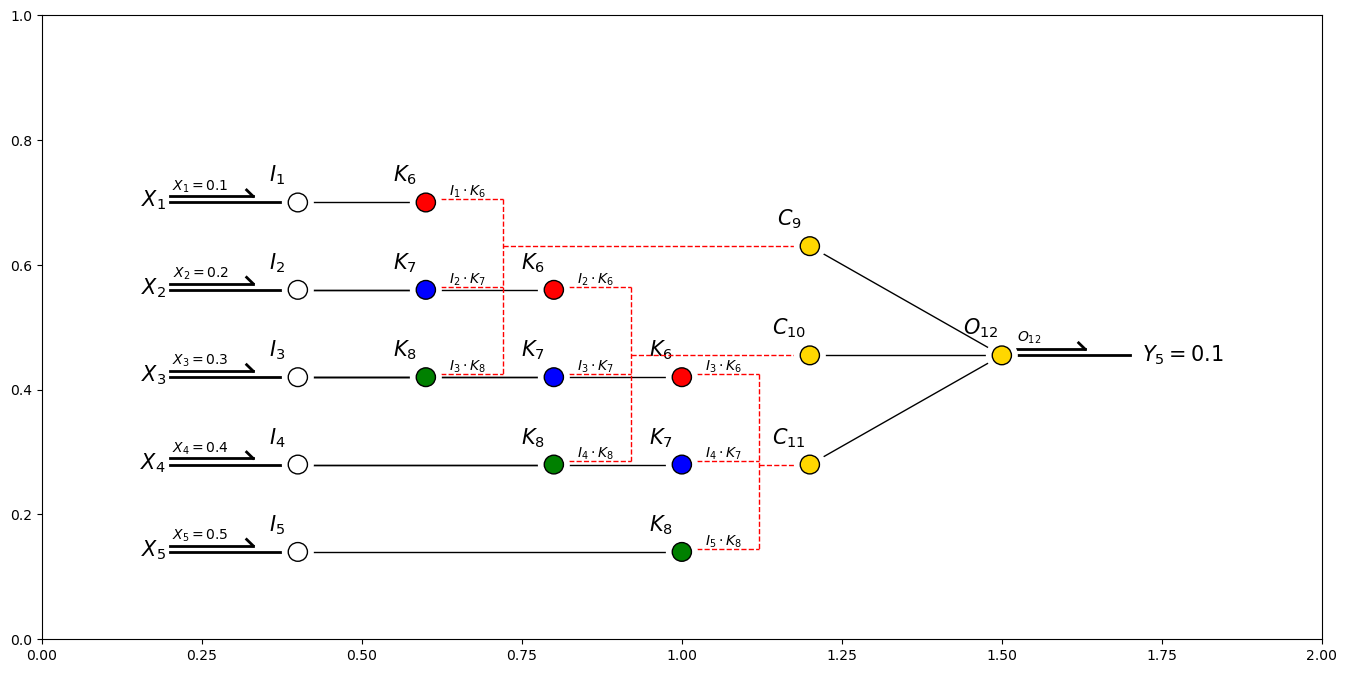

In [10]:
xin = 0.1; yin_range = 0.7
nin = 5

kcolors = ['red','blue','green']
xin = np.array([0.1,0.2,0.3,0.4,0.5])
yout = np.array([y])
cin = np.array([0.1,0.2,0.3])
kx = 0.6

plt.subplot(111)
#plt.gca().set_axis_off()

for i, (xi) in enumerate(zip(xin), start=1):
    eq1 = r"$X_{{{}}}$".format(i)
    eq2 = r"$X_{{{}}} = {}$".format(i, xi[0])
    eq3 = r"$I_{{{}}}$".format(i)
    xpos = 0.4; ypos = yin_range - ((i-1)/nin) * yin_range 
    circle_i1 = plt.Circle((xpos,ypos), 0.015, fill=False, edgecolor = 'black',lw=1,zorder=100); 
    circle_i1b = plt.Circle((xpos,ypos), 0.025, fill=True, facecolor = 'white',edgecolor = None,lw=0.5,zorder=10);
    plt.gca().add_patch(circle_i1); plt.gca().add_patch(circle_i1b)
    plt.annotate(eq1, (xpos-0.2, ypos), textcoords="offset points", xytext=(-12, -3), ha='center',size=15)
    plt.annotate(eq2, (xpos, ypos), textcoords="offset points", xytext=(-70, 9), ha='center')
    plt.plot([xpos-0.2,xpos],[ypos,ypos],color='black',lw=2); plt.plot([xpos-0.2,xpos-0.07],[ypos+0.01,ypos+0.01],color='black',lw=2)
    plt.plot([xpos-0.07,xpos-0.08],[ypos+0.01,ypos+0.02],color='black',lw=2)
    plt.annotate(eq3, (xpos,ypos), textcoords="offset points", xytext=(-15, 15), ha='center',size = 15)

for iconv in range(0,3):  
    xpos = kx+iconv*0.2;
    ytop = yin_range - (iconv/nin)*yin_range - ((1-1)/nin) * yin_range
    ybot = yin_range - (iconv/nin)*yin_range - ((3-1)/nin) * yin_range  
    plt.plot([xpos+0.12,xpos+0.12],[ytop+0.005,ybot+0.005],color='red',lw=1,ls='--',zorder=80)
    for ik, (ki) in enumerate(zip(np.arange(1,4,1)), start=1):
        eq4 = r"$K_{{{}}}$".format(ik+5)
        ypos = yin_range - (iconv/nin)*yin_range - ((ik-1)/nin) * yin_range
        circle_i1 = plt.Circle((xpos,ypos), 0.015, fill=True, facecolor = kcolors[ik-1],edgecolor = 'black',lw=1,zorder=200);
        circle_i1b = plt.Circle((xpos,ypos), 0.025, fill=True, facecolor='white',edgecolor = None,lw=0.5,zorder=190);
        plt.gca().add_patch(circle_i1); plt.gca().add_patch(circle_i1b)
        plt.annotate(eq4, (xpos,ypos), textcoords="offset points", xytext=(-15, 15), ha='center',size = 15)
        plt.plot([0.4,xpos],[ypos,ypos],color='black',lw=1,zorder=1)
        plt.plot([xpos,xpos+0.12],[ypos+0.005,ypos+0.005],color='red',lw=1,ls='--',zorder=80)
        eq8 = r"$I_{{{}}} \cdot K_{{{}}}$".format((iconv)+ik,ik+5)        
        plt.annotate(eq8, (xpos+0.12, ypos), textcoords="offset points", xytext=(-25, 5), ha='center',size = 10)

for ic, (ci) in enumerate(zip(np.arange(1,4,1)), start=1):
    eq5 = r"$C_{{{}}}$".format(ic+8)
    xpos = 1.2; ypos = yin_range - ((ic-1)/4) * yin_range - 0.07
    circle_i1 = plt.Circle((xpos,ypos), 0.015, fill=True, facecolor = 'gold',edgecolor = 'black',lw=1,zorder=200);
    circle_i1b = plt.Circle((xpos,ypos), 0.025, fill=True, facecolor='white',edgecolor = None,lw=0.5,zorder=190);
    plt.gca().add_patch(circle_i1); plt.gca().add_patch(circle_i1b)
    plt.annotate(eq5, (xpos,ypos), textcoords="offset points", xytext=(-15, 15), ha='center',size = 15)
    #plt.plot([0.4,x],[y,y],color='black',lw=1,zorder=1)
    plt.plot([xpos,1.5],[ypos,yin_range - ((2-1)/4) * yin_range - 0.07],color='black',lw=1)
    plt.plot([kx+(ic-1)*0.2+0.12,xpos],[ypos,ypos],color='red',lw=1,ls='--',zorder=80)


eq6 = r"$O_{{{}}}$".format(12)
eq7 = r"$Y_{{{}}} = {}$".format(i, np.round(yout[0],2))
xpos = 1.5; ypos = yin_range - ((2-1)/4) * yin_range - 0.07
circle_i1 = plt.Circle((xpos,ypos), 0.015, fill=True, facecolor = 'gold',edgecolor = 'black',lw=1,zorder=200);
circle_i1b = plt.Circle((xpos,ypos), 0.025, fill=True, facecolor='white',edgecolor = None,lw=0.5,zorder=190);
plt.gca().add_patch(circle_i1); plt.gca().add_patch(circle_i1b)
plt.annotate(eq6, (xpos, ypos), textcoords="offset points", xytext=(-15, 15), ha='center',size = 15)
plt.annotate(eq7, (xpos, ypos), textcoords="offset points", xytext=(130,-4), ha='center',size = 15)
plt.plot([xpos,xpos+0.2],[ypos,ypos],color='black',lw=2); plt.plot([xpos,xpos+0.13],[ypos+0.01,ypos+0.01],color='black',lw=2)
plt.plot([xpos+0.13,xpos+0.12],[ypos+0.01,ypos+0.02],color='black',lw=2)
plt.annotate(eq6, (xpos, ypos), textcoords="offset points", xytext=(20, 10), ha='center')


plt.xlim([0.,2.]); plt.ylim([0,1])

plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=1.3, wspace=0.2, hspace=0.2); plt.show()

and now we can visualize the model training results including,

* weights and biases vs. training epochs

* CNN prediction vs. training epochs

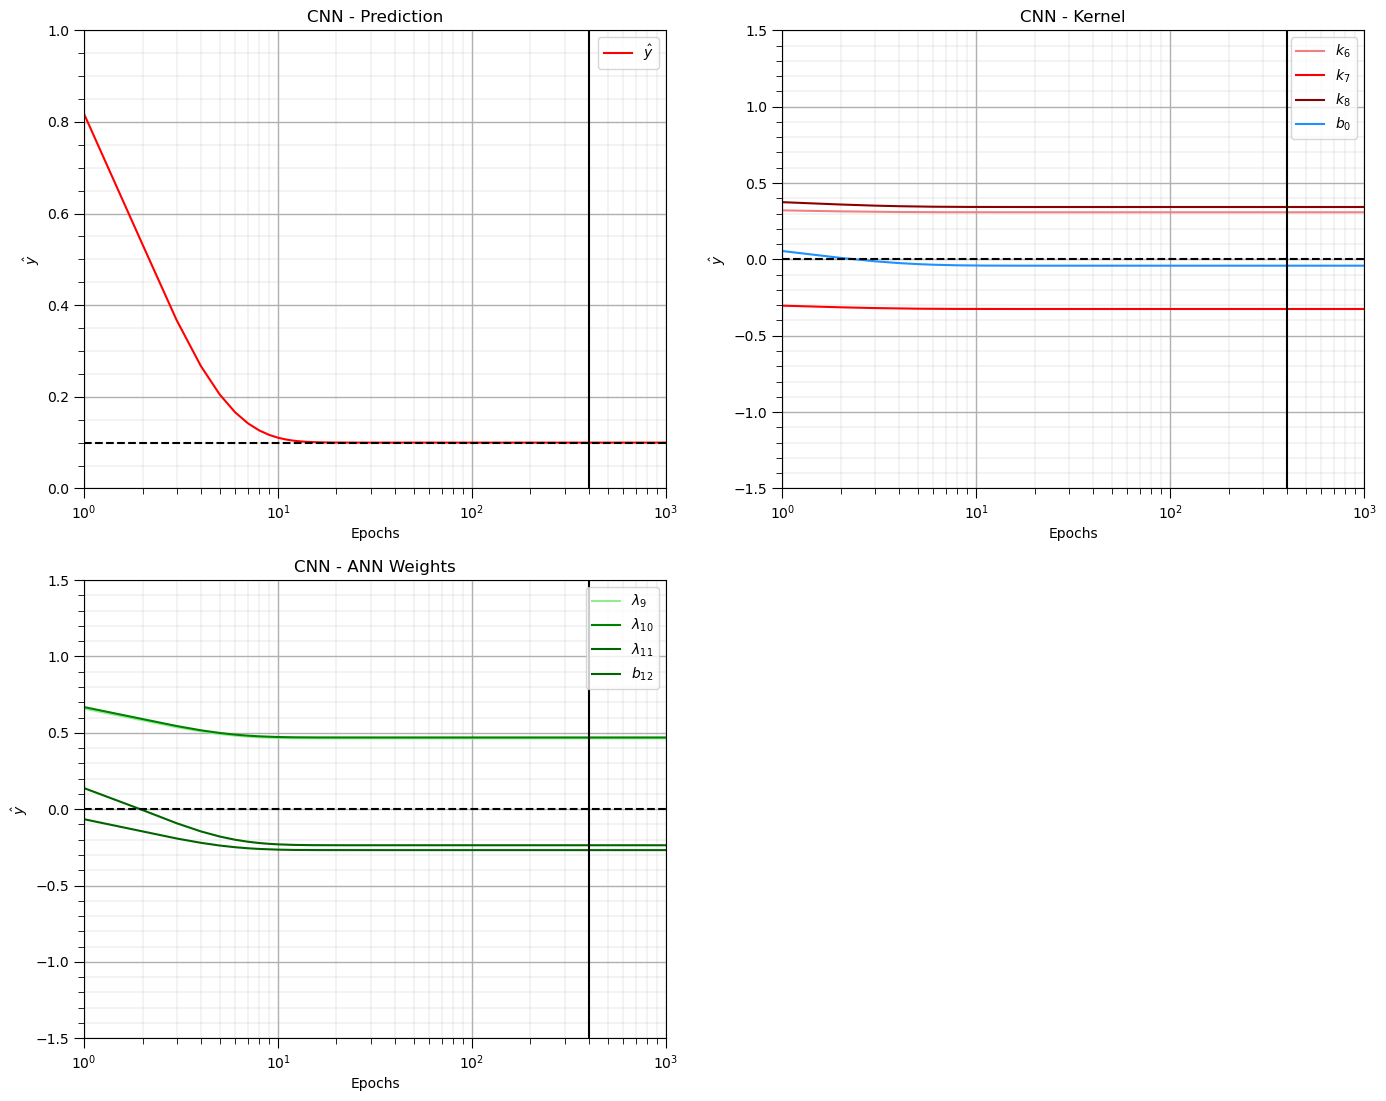

In [12]:
plt.subplot(221)
plt.plot(np.arange(1,nepoch+1,1),o12,color='red',label=r'$\hat{y}$'); plt.xlim([1,nepoch]); plt.ylim([0,1])
plt.xlabel('Epochs'); plt.ylabel(r'$\hat{y}$'); plt.title('CNN - Prediction')
plt.plot([1,nepoch],[y,y],color='black',ls='--'); plt.vlines(400,-1.5,1.5,color='black')
add_grid(); plt.legend(loc='upper right'); plt.xscale('log')

plt.subplot(222)
plt.plot(np.arange(1,nepoch+1,1),w6,color='lightcoral',label = r'$k_6$') 
plt.plot(np.arange(1,nepoch+1,1),w7,color='red',label = r'$k_7$') 
plt.plot(np.arange(1,nepoch+1,1),w8,color='darkred',label = r'$k_8$') 
plt.plot(np.arange(1,nepoch+1,1),bconv,color='dodgerblue',label = r'$b_0$') 
# plt.plot(np.arange(1,nepoch+1,1),w25,color='blue',label = r'$\lambda_{2,5}$') 
# plt.plot(np.arange(1,nepoch+1,1),w35,color='darkblue',label = r'$\lambda_{3,5}$')
# plt.plot(np.arange(1,nepoch+1,1),w46,color='orange',label = r'$\lambda_{4,6}$')
# plt.plot(np.arange(1,nepoch+1,1),w56,color='darkorange',label = r'$\lambda_{5,6}$')
plt.plot([1,nepoch],[0,0],color='black',ls='--')
plt.xlim([1,nepoch]); plt.ylim([-1.5,1.5]); plt.vlines(400,-1.5,1.5,color='black')
plt.xlabel('Epochs'); plt.ylabel(r'$\hat{y}$'); plt.title('CNN - Kernel')
add_grid(); plt.legend(loc='upper right'); plt.xscale('log')

plt.subplot(223)
plt.plot(np.arange(1,nepoch+1,1),w9,color='lightgreen',label = r'$\lambda_{9}$') 
plt.plot(np.arange(1,nepoch+1,1),w10,color='green',label = r'$\lambda_{10}$') 
plt.plot(np.arange(1,nepoch+1,1),w11,color='darkgreen',label = r'$\lambda_{11}$') 
plt.plot(np.arange(1,nepoch+1,1),b12,color='darkgreen',label = r'$b_{12}$') 
plt.plot([1,nepoch],[0,0],color='black',ls='--')
plt.xlim([1,nepoch]); plt.ylim([-1.5,1.5]); plt.vlines(400,-1.5,1.5,color='black')
plt.xlabel('Epochs'); plt.ylabel(r'$\hat{y}$'); plt.title('CNN - ANN Weights')
add_grid(); plt.legend(loc='upper right'); plt.xscale('log')


plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.2, hspace=0.2); plt.show()

Of course, the results above are not very practical, in fact we need our convolutional neural network to generalize by learning over many images, not just 1 as demonstrated above. Let's,

* make a suite of synthetic image data with labels

* apply the batch training method to train on this ensemble of training images.

#### Make Synthetic Training Images with Label

The following code makes random configurations of 5 points with variable slope and additive noise and then retains the slope linear regression model of the data as the label.

The workflow inludes these steps,

1. draw a random slope, $m^{\ell} \sim U\left[-2.0,2.0\right]$

2. sample 5 values on this slope centered at the middle of the values

$$
Z^{\ell} = \left(x-2.5\right)*m^{\ell} 
$$

4. add a random errror to the values, $\epsilon \sim U\left[-\Delta,\Delta\right]$

$$
Z_{\epsilon}^{\ell} = \left(x-2.5\right)*m^{\ell} + U^{-1}\left[-\Delta,\Delta\right](p^{\ell})
$$
   
5. calculate the linear regression model slope to retain as the response feature

$$
m = \frac{<Z_{\epsilon}^{\ell} \cdot x>}{<x \cdot x>}
$$

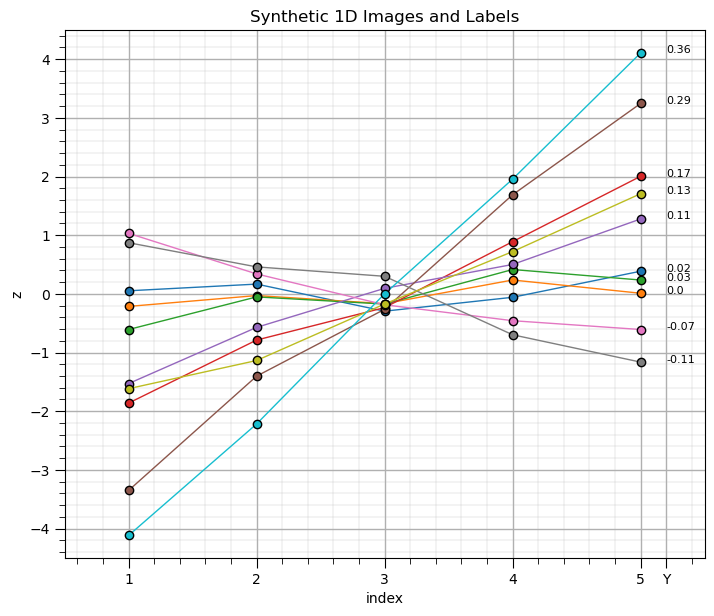

In [14]:
np.random.seed(seed = seed+1)
nsample = 10; nnodes = 5; delta = 0.3
ymat = np.zeros(nsample); x = np.arange(1,nnodes+1,1); Xmat = np.zeros([nsample,nnodes])
for isample in range(0,nsample):
    m = np.random.uniform(low = -2.0, high = 2.0)
    Xmat[isample] = (x-3.0)*m+ np.random.uniform(low=-delta,high=delta,size=nnodes)
    ymat[isample] = np.dot(x, Xmat[isample]) / np.dot(x, x)

isample = 9
plt.subplot(111)
for isample in range(0,nsample):
    plt.scatter(x,Xmat[isample],edgecolor='black',lw=1,zorder=10)
    plt.plot(x,Xmat[isample],lw=1,zorder=1)
    custom_positions = [1,2,3,4,5,5.2]
    custom_labels = ['1','2','3','4','5','Y']
    plt.annotate(np.round(ymat[isample],2),[5.2,Xmat[isample][-1]],size=8,color='black',ha='left')
    plt.gca().set_xticks(custom_positions); plt.gca().set_xticklabels(custom_labels)
    plt.xlim([0.5,5.5]); plt.ylim([-4.5,4.5]); plt.xlabel('index'); plt.ylabel('z'); add_grid(); plt.title('Synthetic 1D Images and Labels')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.1, wspace=0.2, hspace=0.2); plt.show()

#### Training the Simple CNN on Many Training Images

I modified the code above to loops over the batch of training images, sums the error gradients and updates over all the weights and biases for each training epoch.

In [16]:
np.random.seed(seed=seed)                                     # CNN trains over multiple samples

lr = 0.2                                                 # learning rate
nepoch = 1000                                    # number of training epochs

w6 = np.zeros(nepoch); w7 = np.zeros(nepoch); w8 = np.zeros(nepoch)  # initialize the CNN weights
w9 = np.zeros(nepoch); w10 = np.zeros(nepoch); w11 = np.zeros(nepoch)
bconv = np.zeros(nepoch); b12 = np.zeros(nepoch)

k6i1 = np.zeros(nepoch); k6i2 = np.zeros(nepoch); k6i3 = np.zeros(nepoch)
k7i2 = np.zeros(nepoch); k7i3 = np.zeros(nepoch); k7i4 = np.zeros(nepoch)
k8i3 = np.zeros(nepoch); k8i4 = np.zeros(nepoch); k8i5 = np.zeros(nepoch)

dk6i1 = np.zeros(nepoch); dk6i2 = np.zeros(nepoch); dk6i3 = np.zeros(nepoch)
dk7i2 = np.zeros(nepoch); dk7i3 = np.zeros(nepoch); dk7i4 = np.zeros(nepoch)
dk8i3 = np.zeros(nepoch); dk8i4 = np.zeros(nepoch); dk8i5 = np.zeros(nepoch)

c9 = np.zeros(nepoch); c10 = np.zeros(nepoch); c11 = np.zeros(nepoch)
d9 = np.zeros(nepoch); d10 = np.zeros(nepoch); d11 = np.zeros(nepoch)

o12 = np.zeros(nepoch); yhat = np.zeros((nepoch,nsample))

dw6 = np.zeros((nepoch,nsample)); dw7 = np.zeros((nepoch,nsample)); dw8 = np.zeros((nepoch,nsample))
dw9 = np.zeros((nepoch,nsample)); dw10 = np.zeros((nepoch,nsample)); dw11 = np.zeros((nepoch,nsample))
dbconv = np.zeros((nepoch,nsample)); db12 = np.zeros((nepoch,nsample))

d6 = np.zeros(nepoch); d7 = np.zeros(nepoch); d8 = np.zeros(nepoch); 
d19 = np.zeros(nepoch); d10 = np.zeros(nepoch); d11 = np.zeros(nepoch); d12 = np.zeros(nepoch); 

# initialize the weights - Xavier Weight Initialization 
lower, upper = -(1.0 / np.sqrt(3.0)), (1.0 / np.sqrt(3.0)) # lower and upper bound for the weights, uses inputs to node
#lower, upper = -(sqrt(6.0) / sqrt(3.0 + 2.0)), (sqrt(6.0) / sqrt(3.0 + 2.0)) # Normalized Xavier weights, integrates ouputs also
w6[0] = lower + np.random.random() * (upper - lower); 
w7[0] = lower + np.random.random() * (upper - lower); 
w8[0] = lower + np.random.random() * (upper - lower);

lower, upper = -(1.0 / np.sqrt(2.0)), (1.0 / np.sqrt(2.0))
#lower, upper = -(sqrt(6.0) / sqrt(2.0 + 1.0)), (sqrt(6.0) / sqrt(2.0 + 1.0)) # Normalized Xavier weights, integrates ouputs also

w9[0] = lower + np.random.random() * (upper - lower); 
w10[0] = lower + np.random.random() * (upper - lower);     
w11[0] = lower + np.random.random() * (upper - lower);     

#b4[0] = np.random.random(); b5[0] = np.random.random(); b6[0] = np.random.random()
bconv[0] = (np.random.random()-0.5)*0.5
b12[0] = (np.random.random()-0.5)*0.5; # small random value  

for i in range(0,nepoch):
    for isample in range(0,nsample):
        x1, x2, x3, x4, x5 = Xmat[isample]; y = ymat[isample]

        # forward pass of model
        c9[i] = w6[i]*x1 + w7[i]*x2 + w8[i]*x3 + bconv[i]; 
        c9[i] = 1.0/(1 + math.exp(-1*c9[i]))
     
        c10[i] = w6[i]*x2 + w7[i]*x3 + w8[i]*x4 + bconv[i]; 
        c10[i] = 1.0/(1 + math.exp(-1*c10[i]))
     
        c11[i] = w6[i]*x3 + w7[i]*x4 + w8[i]*x5 + bconv[i]; 
        c11[i] = 1.0/(1 + math.exp(-1*c11[i]))
        
        o12[i] = w9[i]*c9[i] + w10[i]*c10[i] + w11[i]*c11[i] + b12[i]
        yhat[i,isample] = o12[i]
        
# back propagate the error through the nodes
        d12[i] = (o12[i]-y) # identity activation o at o12 - switched substraction on May 27, 2025
        d9[i] =  c9[i]*(1-c9[i])*w9[i]*d12[i]   # propagate to the front feature map layer
        d10[i] = c10[i]*(1-c10[i])*w10[i]*d12[i]
        d11[i] = c11[i]*(1-c11[i])*w11[i]*d12[i]
    
        dk6i1 = x1*d9[i]; dk7i2 = x2*d9[i]; dk8i3 = x3*d9[i] 
        dk6i2 = x2*d10[i]; dk7i3 = x3*d10[i]; dk8i4 = x4*d10[i] 
        dk6i3 = x3*d11[i]; dk7i4 = x4*d11[i]; dk8i5 = x5*d11[i] 
    
        d6[i] = dk6i1 + dk6i2 + dk6i3
        d7[i] = dk7i2 + dk7i3 + dk7i4
        d8[i] = dk8i3 + dk8i4 + dk8i5
    
# calculate the change in weights
        if i < nepoch - 1:
            dw6[i,isample] = lr*d6[i]; dw7[i,isample] = lr*d7[i]; dw8[i,isample] = lr*d8[i]
            dw9[i,isample] = lr*c9[i]*d12[i]; dw10[i,isample] = lr*c10[i]*d12[i]; dw11[i,isample] = lr*c11[i]*d12[i];
            dbconv[i,isample] = lr*(d9[i] + d10[i] + d11[i]); db12[i,isample] = lr*d12[i]
    if i < nepoch - 1:
        w6[i+1] = w6[i] - np.average(dw6[i]); w7[i+1] = w7[i] - np.average(dw7[i]); w8[i+1] = w8[i] - np.average(dw8[i])
        w9[i+1] = w9[i] - np.average(dw9[i]); w10[i+1] = w10[i] - np.average(dw10[i]); w11[i+1] = w11[i] - np.average(dw11[i])
        bconv[i+1] = bconv[i] - np.average(dbconv[i]); b12[i+1] = b12[i] - np.average(db12[i])

Now again we can visualize the model performance,

* predictions over all training images vs. training epochs

* model weights and biases vs. training epochs

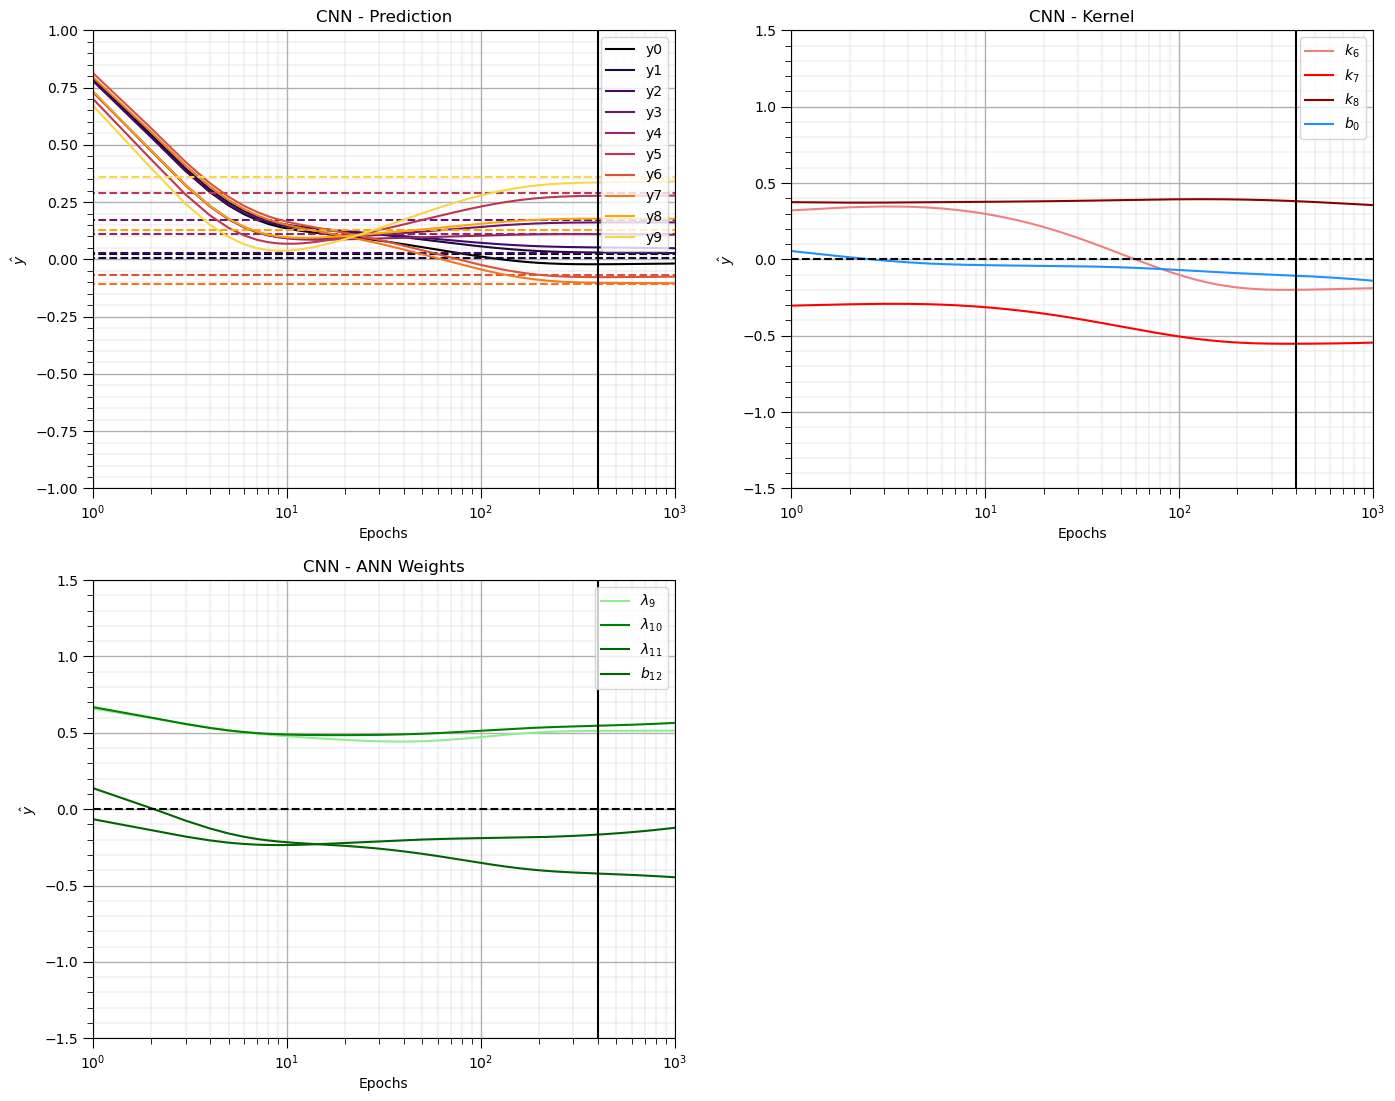

In [18]:
plt.subplot(221)
for isample in range(0,nsample):
    plt.plot(np.arange(1,nepoch+1,1),yhat[:,isample],color=plt.cm.inferno(isample/nsample),label=r'y' + str(isample))
    plt.plot([0,nepoch],[ymat[isample],ymat[isample]],color=plt.cm.inferno(isample/nsample),ls='--')
plt.xlim([1,nepoch]); plt.ylim([-1,1])
plt.xlabel('Epochs'); plt.ylabel(r'$\hat{y}$'); plt.title('CNN - Prediction')
plt.vlines(400,-1.5,1.5,color='black')
add_grid(); plt.legend(loc='upper right'); plt.xscale('log')

plt.subplot(222)
plt.plot(np.arange(1,nepoch+1,1),w6,color='lightcoral',label = r'$k_6$') 
plt.plot(np.arange(1,nepoch+1,1),w7,color='red',label = r'$k_7$') 
plt.plot(np.arange(1,nepoch+1,1),w8,color='darkred',label = r'$k_8$') 
plt.plot(np.arange(1,nepoch+1,1),bconv,color='dodgerblue',label = r'$b_0$') 
plt.plot([1,nepoch],[0,0],color='black',ls='--')
plt.xlim([1,nepoch]); plt.ylim([-1.5,1.5]); plt.vlines(400,-1.5,1.5,color='black')
plt.xlabel('Epochs'); plt.ylabel(r'$\hat{y}$'); plt.title('CNN - Kernel')
add_grid(); plt.legend(loc='upper right'); plt.xscale('log')

plt.subplot(223)
plt.plot(np.arange(1,nepoch+1,1),w9,color='lightgreen',label = r'$\lambda_{9}$') 
plt.plot(np.arange(1,nepoch+1,1),w10,color='green',label = r'$\lambda_{10}$') 
plt.plot(np.arange(1,nepoch+1,1),w11,color='darkgreen',label = r'$\lambda_{11}$') 
plt.plot(np.arange(1,nepoch+1,1),b12,color='darkgreen',label = r'$b_{12}$') 
plt.plot([1,nepoch],[0,0],color='black',ls='--')
plt.xlim([1,nepoch]); plt.ylim([-1.5,1.5]); plt.vlines(400,-1.5,1.5,color='black')
plt.xlabel('Epochs'); plt.ylabel(r'$\hat{y}$'); plt.title('CNN - ANN Weights')
add_grid(); plt.legend(loc='upper right'); plt.xscale('log')


plt.subplots_adjust(left=0.0, bottom=0.0, right=2.0, top=2.1, wspace=0.2, hspace=0.2); plt.show()

#### Comments

This was a basic treatment of convolutional neural networks. Much more could be done and discussed, I have many more resources. Check out my [shared resource inventory](https://michaelpyrcz.com/my-resources) and the YouTube lecture links at the start of this chapter with resource links in the videos' descriptions.

I hope this is helpful,

*Michael*

#### About the Author

<figure style="text-align: center;">
  <img src="_static/intro/michael_pyrcz_officeshot_jacket.jpg" style="display: block; margin: 0 auto; width: 70%;">
  <figcaption style="text-align: center;"> Professor Michael Pyrcz in his office on the 40 acres, campus of The University of Texas at Austin.
</figcaption>
</figure>

Michael Pyrcz is a professor in the [Cockrell School of Engineering](https://cockrell.utexas.edu/faculty-directory/alphabetical/p), and the [Jackson School of Geosciences](https://www.jsg.utexas.edu/researcher/michael_pyrcz/), at [The University of Texas at Austin](https://www.utexas.edu/), where he researches and teaches subsurface, spatial data analytics, geostatistics, and machine learning. Michael is also,

* the principal investigator of the [Energy Analytics](https://fri.cns.utexas.edu/energy-analytics) freshmen research initiative and a core faculty in the Machine Learn Laboratory in the College of Natural Sciences, The University of Texas at Austin

* an associate editor for [Computers and Geosciences](https://www.sciencedirect.com/journal/computers-and-geosciences/about/editorial-board), and a board member for [Mathematical Geosciences](https://link.springer.com/journal/11004/editorial-board), the International Association for Mathematical Geosciences. 

Michael has written over 70 [peer-reviewed publications](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en), a [Python package](https://pypi.org/project/geostatspy/) for spatial data analytics, co-authored a textbook on spatial data analytics, [Geostatistical Reservoir Modeling](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) and author of two recently released e-books, [Applied Geostatistics in Python: a Hands-on Guide with GeostatsPy](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) and [Applied Machine Learning in Python: a Hands-on Guide with Code](https://geostatsguy.github.io/MachineLearningDemos_Book/intro.html).

All of Michael’s university lectures are available on his [YouTube Channel](https://www.youtube.com/@GeostatsGuyLectures) with links to 100s of Python interactive dashboards and well-documented workflows in over 40 repositories on his [GitHub account](https://github.com/GeostatsGuy), to support any interested students and working professionals with evergreen content. To find out more about Michael’s work and shared educational resources visit his [Website](www.michaelpyrcz.com).

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PI is Professor John Foster)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Professor, Cockrell School of Engineering and The Jackson School of Geosciences, The University of Texas at Austin

More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Geostatistics Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [Applied Geostats in Python e-book](https://geostatsguy.github.io/GeostatsPyDemos_Book/intro.html) | [Applied Machine Learning in Python e-book](https://geostatsguy.github.io/MachineLearningDemos_Book/) | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)